In [6]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-poster')


In [7]:
df_all = pd.read_csv("./new_linkedin/job_postings.csv")
df_skill = pd.read_csv("./new_linkedin/job_details/job_skills.csv")

In [8]:
df=df_all.merge(df_skill,how="left",on="job_id")

In [9]:
df

,job_id,company_id,title,description,max_salary,med_salary,min_salary,pay_period,formatted_work_type,location,...,closed_time,formatted_experience_level,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,skill_abr
0,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,NaN,NaN,1692749193000,NaN,1,FULL_TIME,USD,BASE_SALARY,SALE
1,85008768,NaN,Licensed Insurance Agent,While many industries were hurt by the last fe...,52000.0,NaN,45760.0,YEARLY,Full-time,"Chico, CA",...,NaN,NaN,NaN,1692749193000,NaN,1,FULL_TIME,USD,BASE_SALARY,BD
2,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,NaN,NaN,NaN,1692834553000,NaN,0,FULL_TIME,NaN,NaN,SALE
3,133114754,77766802.0,Sales Manager,Are you a dynamic and creative marketing profe...,NaN,NaN,NaN,NaN,Full-time,"Santa Clarita, CA",...,NaN,NaN,NaN,1692834553000,NaN,0,FULL_TIME,NaN,NaN,BD
4,133196985,1089558.0,Model Risk Auditor,Join Us as a Model Risk Auditor – Showcase You...,NaN,NaN,NaN,NaN,Contract,"New York, NY",...,NaN,NaN,NaN,1692729872000,NaN,0,CONTRACT,NaN,NaN,ACCT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27599,3701373522,38897.0,Unit Secretary,Job Title: Unit Secretary\nDepartment: Nursing...,NaN,NaN,NaN,NaN,Full-time,"Teaneck, NJ",...,NaN,Entry level,NaN,1692744368000,recruiting.ultipro.com,0,FULL_TIME,NaN,NaN,ADM
27600,3701373523,38897.0,"Radiology Aide, Perdiem","Job Title: Radiology Aide, Perdiem\nDepartment...",NaN,NaN,NaN,NaN,Part-time,"Teaneck, NJ",...,NaN,Entry level,NaN,1692744368000,recruiting.ultipro.com,0,PART_TIME,NaN,NaN,HCPR
27601,3701373524,2623.0,MRI Manager,Grade 105\nJob Type: Officer of Administration...,135000.0,NaN,110000.0,YEARLY,Full-time,"New York, NY",...,NaN,Mid-Senior level,NaN,1692744071000,opportunities.columbia.edu,0,FULL_TIME,USD,BASE_SALARY,OTHR
27602,3701373527,84659.0,Area Director of Business Development,Nexion Health Management affiliates operate 56...,NaN,NaN,NaN,NaN,Full-time,"Vicksburg, MS",...,NaN,NaN,NaN,1692743131000,NaN,0,FULL_TIME,NaN,NaN,BD


<Axes: >

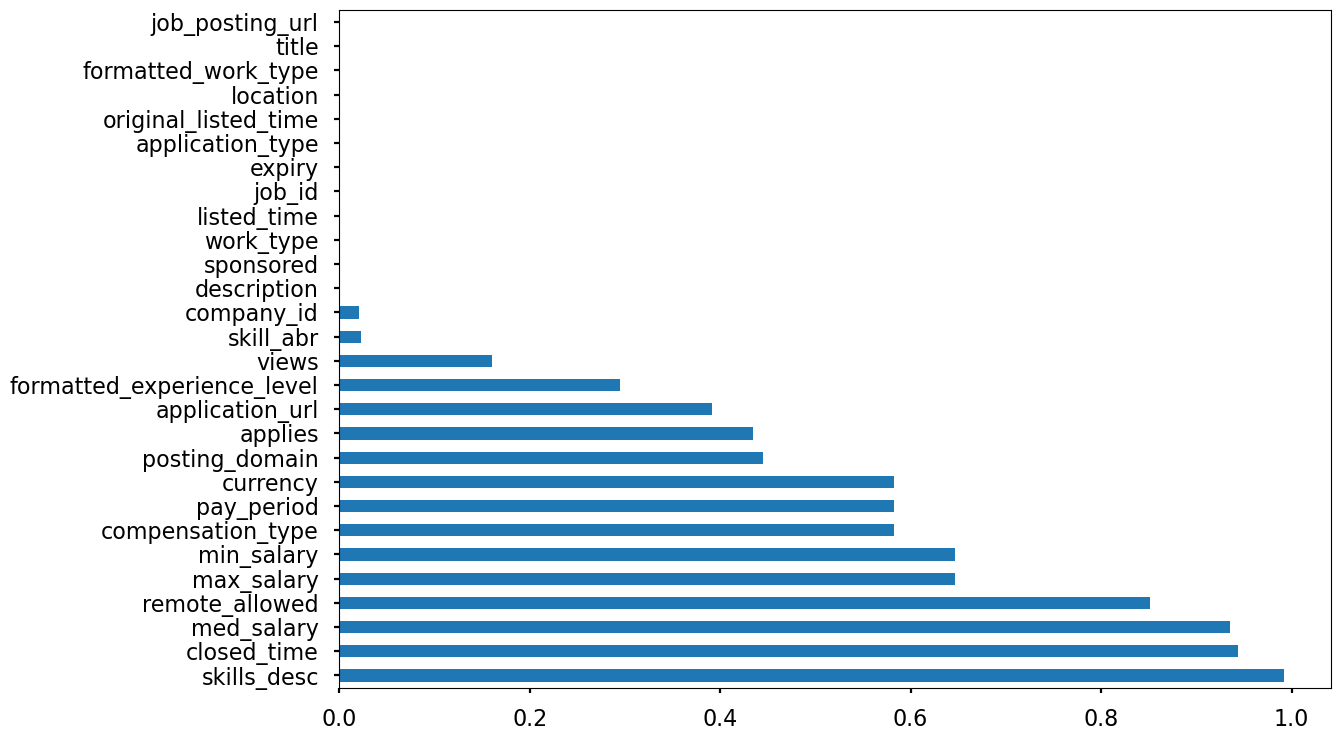

In [10]:
(df.isnull().sum().sort_values(ascending=False)/df.shape[0]).plot(kind='barh')

In [11]:
# df['sponsored'].sum()/df.shape[0]

In [12]:
# df_sp = df[df['sponsored'] == 0]

In [13]:
# df_sp

In [14]:
# df_sp.location.value_counts()[:30].plot(kind="barh")

In [15]:
# df_sp.skill_abr.value_counts()
# df_sp.title.value_counts()[:40]

<Axes: >

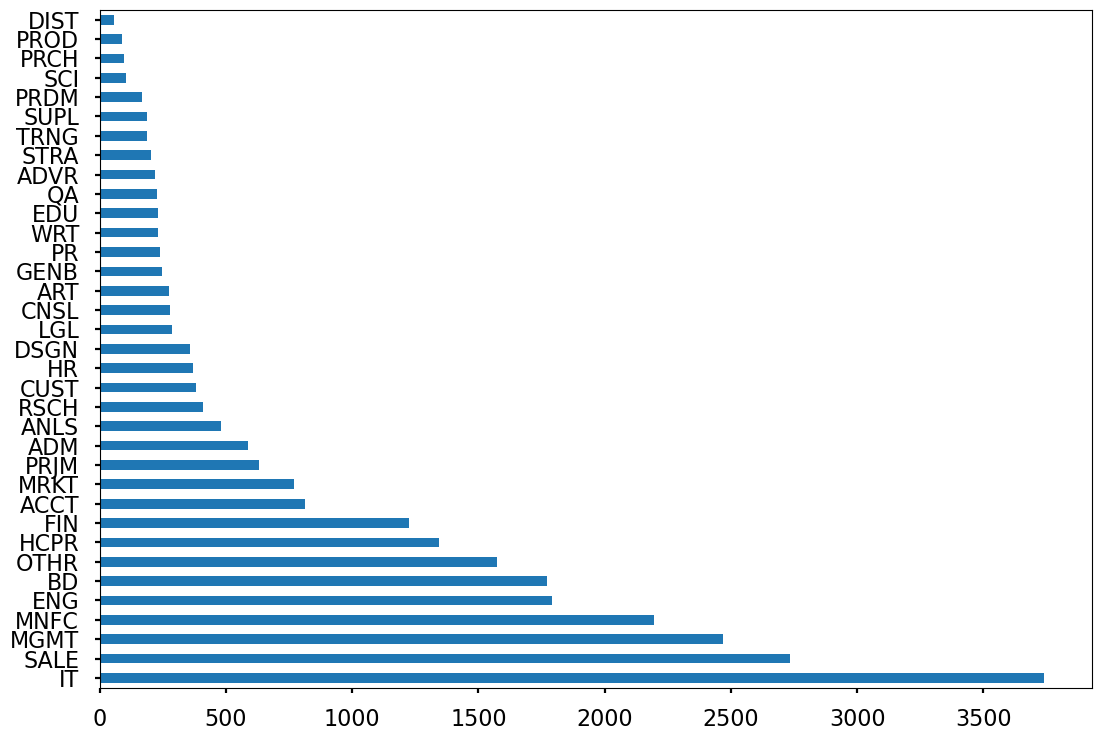

In [16]:
df["skill_abr"].value_counts().plot(kind="barh")


In [17]:
df['avg_salary'] = (df["max_salary"] + df["min_salary"])/2

In [40]:
# df['avg_salary']
df_salary = df.groupby("skill_abr").mean().reset_index()[['skill_abr','avg_salary','med_salary','max_salary','min_salary']]
df_salary

/var/folders/km/yp2cyvtx0114js4bh843m8mw0000gn/T/ipykernel_53767/1285082666.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_salary = df.groupby("skill_abr").mean().reset_index()[['skill_abr','avg_salary','med_salary','max_salary','min_salary']]


,skill_abr,avg_salary,med_salary,max_salary,min_salary
0,ACCT,81667.314533,45061.088000,90934.299115,72400.329952
1,ADM,43684.924928,9132.642500,48860.919529,38508.930326
2,ADVR,98174.168889,193706.233333,115335.528889,81012.808889
3,ANLS,72498.446593,8347.256667,85627.681044,59369.212143
4,ART,59423.039330,68013.342000,69004.290804,49841.787857
5,BD,95647.387859,93030.847184,115983.966826,75310.808891
6,CNSL,121016.310526,50340.166667,144059.139386,97973.481667
7,CUST,38053.671243,7795.060000,43909.536723,32197.805763
8,DIST,80509.321400,17.500000,95437.381200,65581.261600
9,DSGN,57696.139648,18759.419412,67111.138125,48281.141172


In [19]:
df_salary[df_salary['med_salary']>df_salary['max_salary']]

,skill_abr,avg_salary,med_salary,max_salary,min_salary
2,ADVR,98174.168889,193706.233333,115335.528889,81012.808889
17,LGL,102859.213087,172140.722500,118859.568121,86858.858054
24,PRDM,137717.309043,555000.000000,164173.681383,111260.936702


In [47]:
df_salary = df_salary.sort_values(by='avg_salary', ascending=False).reset_index()
df_salary

,index,skill_abr,avg_salary,med_salary,max_salary,min_salary
0,24,PRDM,137717.309043,555000.000000,164173.681383,111260.936702
1,31,STRA,136728.907824,54819.000000,158330.633148,115127.182500
2,6,CNSL,121016.310526,50340.166667,144059.139386,97973.481667
3,11,ENG,113044.565792,117030.398776,133620.317977,92468.813607
4,13,GENB,104966.546959,11837.345882,123236.564639,86696.529278
5,25,PRJM,103058.732569,117769.783333,120841.169828,85276.295310
6,17,LGL,102859.213087,172140.722500,118859.568121,86858.858054
7,2,ADVR,98174.168889,193706.233333,115335.528889,81012.808889
8,5,BD,95647.387859,93030.847184,115983.966826,75310.808891
9,12,FIN,95122.817808,69847.598696,114424.761576,75820.874040


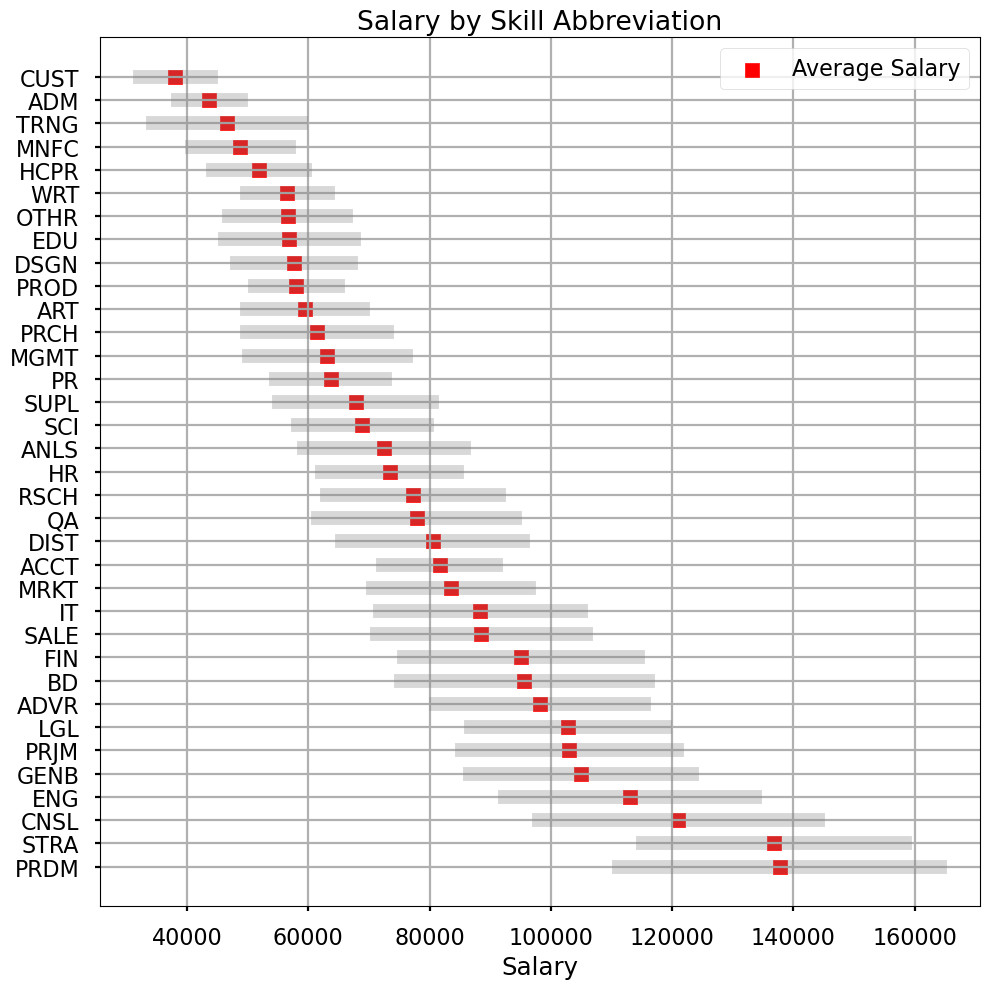

In [46]:
# df_salary.sort_values('avg_salary', ascending=False, inplace=True)
# Set the figure size and create a plot
plt.figure(figsize=(10, 10))

# Plot salary ranges as horizontal bars
for index, row in df_salary.iterrows():
    plt.plot([row['min_salary'], row['max_salary']], [index, index], color='gray', alpha=0.3, lw=10)

# Plot med_salary and avg_salary as points with different colors
# plt.scatter(df_salary['med_salary'], range(len(df_salary)), color='blue', label='Median Salary', marker='o', s=100)
plt.scatter(df_salary['avg_salary'], range(len(df_salary)), color='red', label='Average Salary', marker='s', s=100)

# Customize the plot
plt.yticks(range(len(df_salary)), df_salary['skill_abr'])
plt.xlabel('Salary')
plt.title('Salary by Skill Abbreviation')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

In [96]:
df["skill_abr"].value_counts()
# df_salary #["avg_salary"]
df_salary.set_index("skill_abr")['avg_salary']
df_money = pd.DataFrame()
df_money['salary'] = df_salary.set_index("skill_abr")['avg_salary']
df_money['count'] = df["skill_abr"].value_counts()

In [145]:
t = 20

/var/folders/km/yp2cyvtx0114js4bh843m8mw0000gn/T/ipykernel_53767/1357013662.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_money_filtered = df_money_filtered.append(other)


<Axes: ylabel='total'>

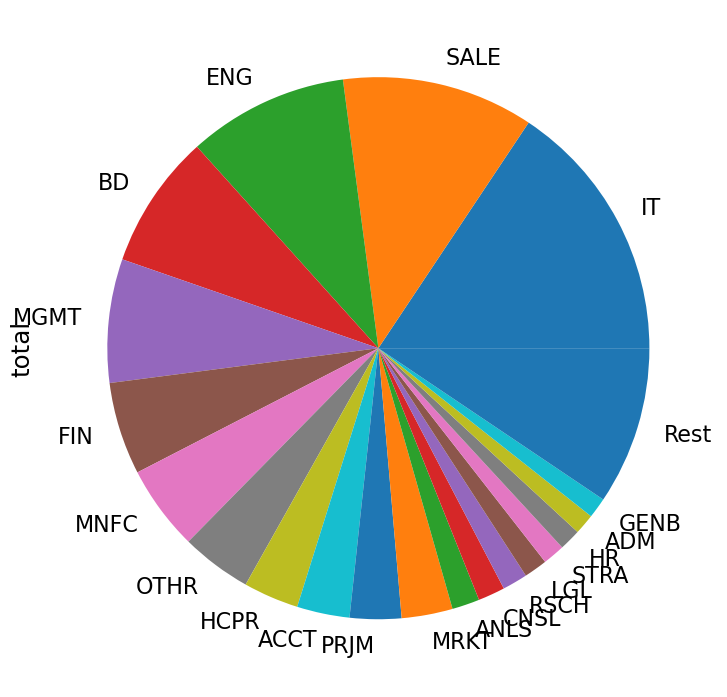

In [146]:
df_money['total'] = df_money['salary'] * df_money['count']
df_money.sort_values(by='total', ascending=False, inplace=True)
df_money.reset_index()
df_money_filtered = df_money.iloc[:t,]
other = df_money.iloc[t:, :].sum().to_frame().T


df_money_filtered = df_money_filtered.append(other)
df_money_filtered = df_money_filtered.rename({0: "Rest"})
df_money_filtered.reset_index()
df_money_filtered
df_money_filtered['total'].plot(kind='pie')

/var/folders/km/yp2cyvtx0114js4bh843m8mw0000gn/T/ipykernel_53767/1114329641.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_money_count_filtered = df_money_count_filtered.append(other_count)


<Axes: ylabel='count'>

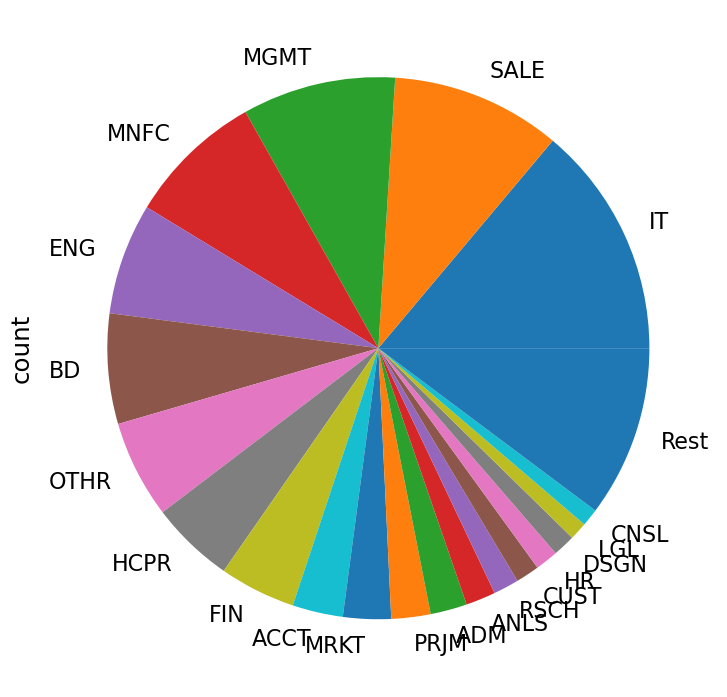

In [147]:
df_money.sort_values(by='count', ascending=False, inplace=True)
df_money.reset_index()
df_money_count_filtered = df_money.iloc[:t,]
other_count = df_money.iloc[t:, :].sum().to_frame().T


df_money_count_filtered = df_money_count_filtered.append(other_count)
df_money_count_filtered = df_money_count_filtered.rename({0: "Rest"})
df_money_count_filtered.reset_index()
# df_money_filtered
df_money_count_filtered['count'].plot(kind='pie')

In [148]:
df_money_filtered.reset_index(inplace=True)
df_money_filtered.rename(columns={'index':'skill_abr'}, inplace=True)
df_money_filtered = df_money_filtered[['skill_abr','total']]

df_money_count_filtered.reset_index(inplace=True)
df_money_count_filtered.rename(columns={'index':'skill_abr'}, inplace=True)
df_money_count_filtered = df_money_count_filtered[['skill_abr','count']]
df_money_count_filtered

,skill_abr,count
0,IT,3742.0
1,SALE,2733.0
2,MGMT,2467.0
3,MNFC,2195.0
4,ENG,1791.0
5,BD,1772.0
6,OTHR,1574.0
7,HCPR,1346.0
8,FIN,1227.0
9,ACCT,813.0


In [149]:
df_money_filtered

,skill_abr,total
0,IT,3.307679e+08
1,SALE,2.419069e+08
2,ENG,2.024628e+08
3,BD,1.694872e+08
4,MGMT,1.557900e+08
5,FIN,1.167157e+08
6,MNFC,1.071521e+08
7,OTHR,8.908171e+07
8,HCPR,6.981424e+07
9,ACCT,6.639553e+07


In [151]:
combined_df['total'].sum()

2060523536.7905433

In [152]:
combined_df['total'] = combined_df['total']/ combined_df['total'].sum()
combined_df['count'] = combined_df['count']/ combined_df['count'].sum()
combined_df

,skill_abr,total,count
0,IT,0.160526,0.142667
1,SALE,0.117401,0.104198
2,ENG,0.098258,0.068283
3,BD,0.082254,0.067559
4,MGMT,0.075607,0.094056
5,FIN,0.056644,0.046780
6,MNFC,0.052002,0.083686
7,OTHR,0.043233,0.060010
8,HCPR,0.033882,0.051317
9,ACCT,0.032223,0.030996


<Figure size 1200x600 with 0 Axes>

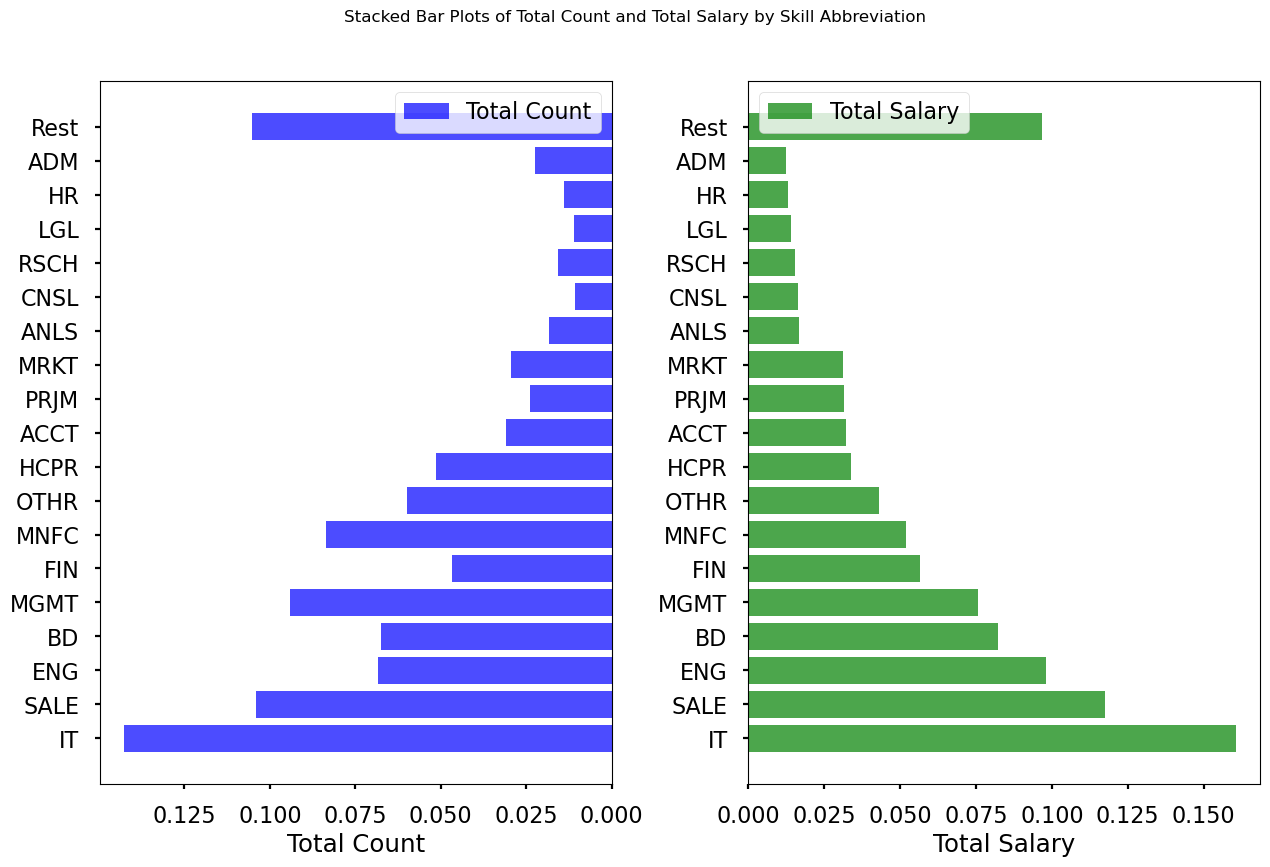

In [153]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a combined DataFrame for plotting
combined_df = pd.merge(df_money_filtered, df_money_count_filtered, on='skill_abr')

combined_df['total'] = combined_df['total']/ combined_df['total'].sum()
combined_df['count'] = combined_df['count']/ combined_df['count'].sum()
# combined_df
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a subplot with two side-by-side axes
fig, ax = plt.subplots(1, 2)

# Create the first stacked bar chart for 'count' on the left
ax[0].barh(combined_df['skill_abr'], combined_df['count'], label='Total Count', color='b', alpha=0.7)
ax[0].set_xlabel('Total Count')

# Create the second stacked bar chart for 'total' on the right
ax[1].barh(combined_df['skill_abr'], combined_df['total'], label='Total Salary', color='g', alpha=0.7)
ax[1].set_xlabel('Total Salary')

# Add labels and legend
fig.suptitle('Stacked Bar Plots of Total Count and Total Salary by Skill Abbreviation')
ax[0].invert_xaxis()  # Invert the x-axis for 'count' to have 'Rest' on top
ax[0].legend(loc='upper right')
ax[1].legend(loc='upper left')

# Adjust the layout to make space for the labels
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()
